In [1]:
import os

project_root = "/Users/nimisha/Desktop/learning/news-reliability-detector/"
os.chdir(project_root)

In [21]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.classification import (
    RandomForestClassificationModel,
    LogisticRegressionModel,
    NaiveBayesModel,
)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

from src.preprocessing.tokenization import tokenize_data
from src.utils.evaluator import evaluate_model
from src.utils.confusion_matrix import plot_confusion_matrix, get_confusion_matrix

plt.style.use("ggplot")

In [3]:
spark = SparkSession.builder.appName("ModelComparison").getOrCreate()

24/01/13 19:10:33 WARN Utils: Your hostname, centella.local resolves to a loopback address: 127.0.0.1; using 192.168.1.71 instead (on interface en0)
24/01/13 19:10:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/13 19:10:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
train_transformed, test_transformed = tokenize_data(spark)

In [17]:
rf_model = RandomForestClassificationModel.load("models/random_forest")
lr_model = LogisticRegressionModel.load("models/logistic_regression")
nb_model = NaiveBayesModel.load("models/naive_bayes")

In [18]:
lr_predictions = lr_model.transform(test_transformed)
rf_predictions = rf_model.transform(test_transformed)
nb_predictions = nb_model.transform(test_transformed)

In [ ]:
lr_conf_matrix = get_confusion_matrix(lr_predictions, "target")
rf_conf_matrix = get_confusion_matrix(rf_predictions, "target")
nb_conf_matrix = get_confusion_matrix(nb_predictions, "target")

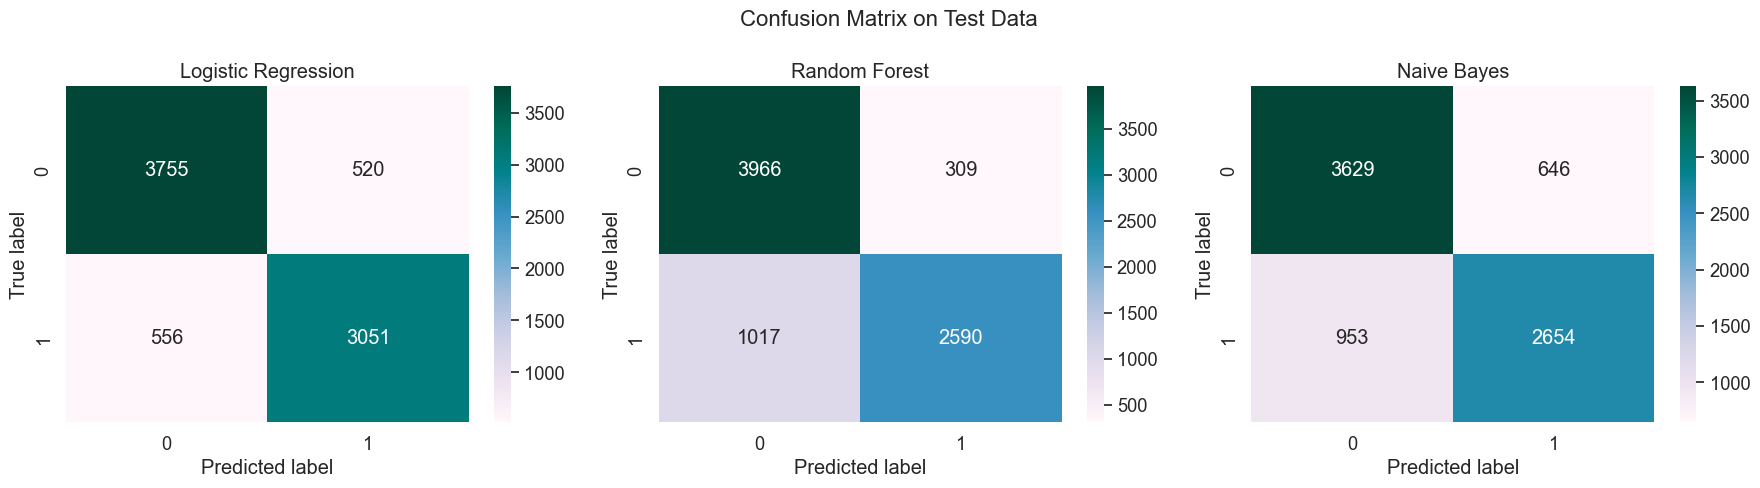

In [24]:
classes = [str(label) for label in range(2)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Confusion Matrix on Test Data", fontsize=16)

plot_confusion_matrix(axes[0], lr_conf_matrix, classes, "Logistic Regression")
plot_confusion_matrix(axes[1], rf_conf_matrix, classes, "Random Forest")
plot_confusion_matrix(axes[2], nb_conf_matrix, classes, "Naive Bayes")

plt.tight_layout()
plt.show()

# Precision
- Out of all prediction as FAKE(1), Random Forest Model has highest precision
- Out of all prediction as NOT FAKE(0), Random Forest Model has highest precision

# Recall
- Out of all actual FAKE(1), Logistic Regression Model is more accurate
- Out of all acutal NOT FAKE(0), Logistic Regression Model is more accurate